In [1]:
"""
Created on Mon Aug 12 18:21:44 2024

@author: Junwoo
"""
# importing required libraries 
from torchcpd import RigidRegistration
from torchcpd import AffineRegistration
from torchcpd import DeformableRegistration
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import numpy as np 

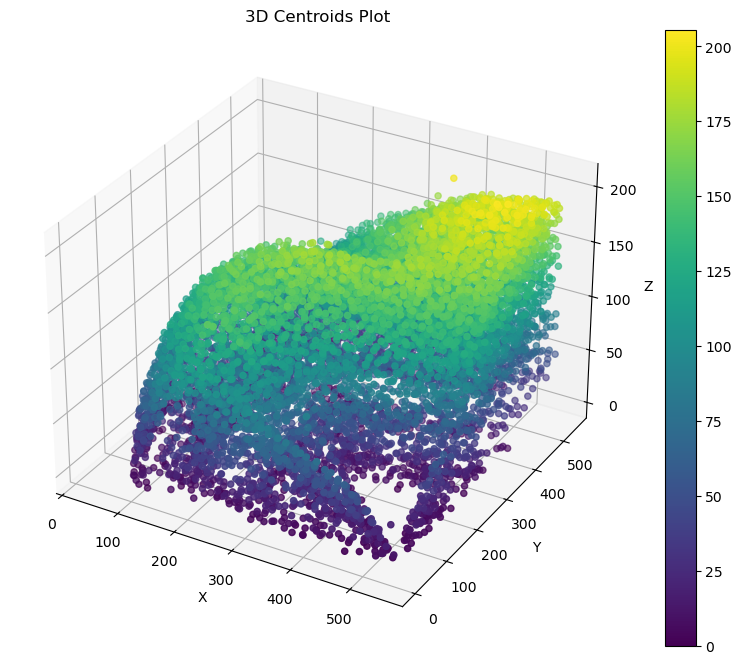

In [2]:
# Load the data
arr = np.loadtxt("N:/Data/Heart HH16-17/cropped C1-Round 1 Heart 4 20x MYH15 TBX18 TIE1 Face 1-1_centroids_coord.csv", 
                 delimiter=",", dtype=str)
arr = arr.astype(np.float64)

# Use inline backend instead of widget
%matplotlib inline

# Create a new figure and 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates
xs = arr[:, 0]
ys = arr[:, 1]
zs = arr[:, 2]

# Create the 3D scatter plot
scatter = ax.scatter(xs, ys, zs, c=zs, cmap='viridis', marker='o')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Centroids Plot')

# Add a color bar
plt.colorbar(scatter)

# Enable grid
ax.grid(True)

# Show the plot
plt.show()

In [3]:
# create a translation to apply to the target for testing the registration
translation = [0, 1000, 0]

# create a rotation to apply to the target for testing the registration
thetax = (30/180)*np.pi
thetay = (30/180)*np.pi
thetaz = (30/180)*np.pi

rotx = np.array([
 [1, 0, 0],
 [0, np.cos(thetax), -np.sin(thetax)],
 [0, np.sin(thetax), np.cos(thetax)],
])

roty = np.array([
 [np.cos(thetay), 0, np.sin(thetay)],
 [0, 1, 0],
 [-np.sin(thetay), 0, np.cos(thetay)],
])

rotz = np.array([
 [np.cos(thetaz), -np.sin(thetaz), 0],
 [np.sin(thetaz), np.cos(thetaz), 0],
 [0, 0, 1],
])


# apply rotation through dot products
rot = np.dot(np.dot(rotx, roty),rotz)
rotated = rot.dot(arr.T).T

In [4]:
# create a fake source by adding a translation to the target.
# in a real use, you would load the source points from a file or other source.
# the only requirement is that this array also be 2-dimensional and that the
# second dimension be the same length as the second dimension of the target array.
source = rotated + translation


In [5]:
# create a RigidRegistration object
reg = RigidRegistration(X=arr, Y=source)

In [14]:
import numpy as np
import torch
from torchcpd import RigidRegistration

# Convert tensors back to numpy for registration
arr_np = arr.numpy()  # If arr is already a tensor
translation_np = np.array([0, 1000, 0], dtype=np.float32)

# Create rotation angles in numpy
thetax = (30/180)*np.pi
thetay = (30/180)*np.pi
thetaz = (30/180)*np.pi

# Create rotation matrices with numpy
rotx = np.array([
    [1, 0, 0],
    [0, np.cos(thetax), -np.sin(thetax)],
    [0, np.sin(thetax), np.cos(thetax)],
], dtype=np.float32)

roty = np.array([
    [np.cos(thetay), 0, np.sin(thetay)],
    [0, 1, 0],
    [-np.sin(thetay), 0, np.cos(thetay)],
], dtype=np.float32)

rotz = np.array([
    [np.cos(thetaz), -np.sin(thetaz), 0],
    [np.sin(thetaz), np.cos(thetaz), 0],
    [0, 0, 1],
], dtype=np.float32)

# Apply rotations and translation using numpy
rot = np.dot(np.dot(rotx, roty), rotz)
rotated = np.dot(arr_np, rot.T)
source = rotated + translation_np

# Create registration object with numpy arrays
reg = RigidRegistration(
    X=arr_np,
    Y=source,
    max_iterations=100,
    tolerance=1e-5,
    w=0.0,
)

try:
    # Run registration
    TY, (s_reg, R_reg, t_reg) = reg.register()
    
    # Print registration results
    print("Scale:", s_reg)
    print("Rotation matrix:\n", R_reg)
    print("Translation vector:", t_reg)
    
    # Calculate registration error
    error = np.mean(np.linalg.norm(TY - arr_np, axis=1))
    print("Average registration error:", error)

except Exception as e:
    print("Registration error:", str(e))
    print("X array info:", arr_np.dtype, arr_np.shape)
    print("Y array info:", source.dtype, source.shape)

Scale: tensor(1.0000, device='cuda:0')
Rotation matrix:
 tensor([[ 0.7500, -0.4330,  0.5000],
        [ 0.6495,  0.6250, -0.4330],
        [-0.1250,  0.6495,  0.7500]], device='cuda:0')
Translation vector: tensor([-649.5188, -624.9999,  433.0128], device='cuda:0')
Registration error: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
X array info: float32 (11654, 3)
Y array info: float32 (11654, 3)


In [17]:
import numpy as np
import torch
from torchcpd import RigidRegistration

# Convert tensors back to numpy for registration
arr_np = arr.numpy()  # If arr is already a tensor
translation_np = np.array([0, 1000, 0], dtype=np.float32)

# Create rotation angles in numpy
thetax = (30/180)*np.pi
thetay = (30/180)*np.pi
thetaz = (30/180)*np.pi

# Create rotation matrices with numpy
rotx = np.array([
    [1, 0, 0],
    [0, np.cos(thetax), -np.sin(thetax)],
    [0, np.sin(thetax), np.cos(thetax)],
], dtype=np.float32)

roty = np.array([
    [np.cos(thetay), 0, np.sin(thetay)],
    [0, 1, 0],
    [-np.sin(thetay), 0, np.cos(thetay)],
], dtype=np.float32)

rotz = np.array([
    [np.cos(thetaz), -np.sin(thetaz), 0],
    [np.sin(thetaz), np.cos(thetaz), 0],
    [0, 0, 1],
], dtype=np.float32)

# Apply rotations and translation using numpy
rot = np.dot(np.dot(rotx, roty), rotz)
rotated = np.dot(arr_np, rot.T)
source = rotated + translation_np

# Create registration object with numpy arrays
reg = RigidRegistration(
    X=arr_np,
    Y=source,
    max_iterations=100,
    tolerance=1e-5,
    w=0.0,
)

try:
    # Run registration
    TY, (s_reg, R_reg, t_reg) = reg.register()
    
    # Move tensors to CPU and convert to numpy for printing/calculation
    s_reg_np = s_reg.cpu().numpy()
    R_reg_np = R_reg.cpu().numpy()
    t_reg_np = t_reg.cpu().numpy()
    TY_np = TY.cpu().numpy()
    
    # Print registration results
    print("Scale:", s_reg_np)
    print("Rotation matrix:\n", R_reg_np)
    print("Translation vector:", t_reg_np)
    
    # Calculate registration error using numpy arrays
    error = np.mean(np.linalg.norm(TY_np - arr_np, axis=1))
    print("Average registration error:", error)
    
    # Optional: Save the registration parameters
    # np.save('registration_params.npz', {
    #     'scale': s_reg_np,
    #     'rotation': R_reg_np,
    #     'translation': t_reg_np
    # })

except Exception as e:
    print("Registration error:", str(e))
    print("X array info:", arr_np.dtype, arr_np.shape)
    print("Y array info:", source.dtype, source.shape)

Scale: 0.99999994
Rotation matrix:
 [[ 0.7500002  -0.43301275  0.50000006]
 [ 0.6495189   0.62499994 -0.43301284]
 [-0.12500009  0.6495191   0.7500003 ]]
Translation vector: [-649.5188  -624.9999   433.01282]
Average registration error: 9.949089e-05


In [15]:
# run the registration & collect the results
TY, (s_reg, R_reg, t_reg) = reg.register()

In [16]:

# TY is the transformed source points
# the values in () are the registration parameters.
# In this case of rigid registration they are:
#     s_reg the scale of the registration
#     R_reg the rotation matrix of the registration
#     t_reg the translation of the registration

registrationRMS = np.sqrt(np.mean((TY-arr)**2))
print('RMS of registraion:', registrationRMS)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

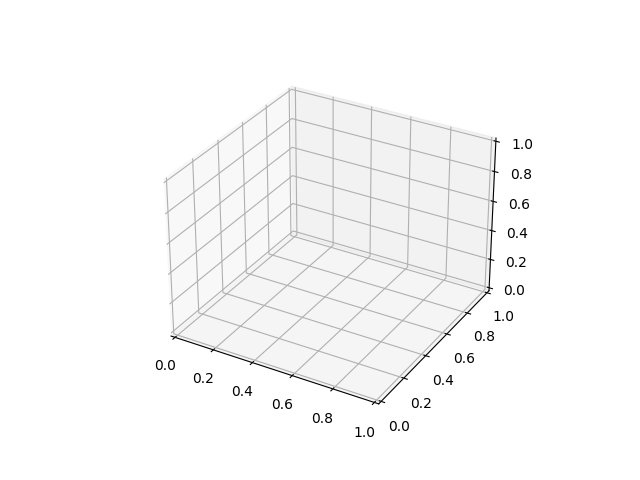

In [3]:
# creating figure 
figg = plt.figure() 
ax = figg.add_subplot(111, projection='3d') 

In [4]:
ax.clear()
plot_geeks = ax.scatter(xs, ys, zs, marker='o', c='r') 
plot_geeks = ax.scatter(source[:,[0]], source[:,[1]], source[:,[2]], marker='o', facecolors='none', edgecolors='b', linewidths = 2) 

# setting title and labels 
ax.set_title("Large Rotation & translation") 
ax.set_xlabel('x-axis') 
ax.set_ylabel('y-axis') 
ax.set_zlabel('z-axis') 

# setting limits to each axis
ax.set_xlim(-1100,1100)
ax.set_ylim(-100,2100)
ax.set_zlim(-1100,1100)

(-1100.0, 1100.0)

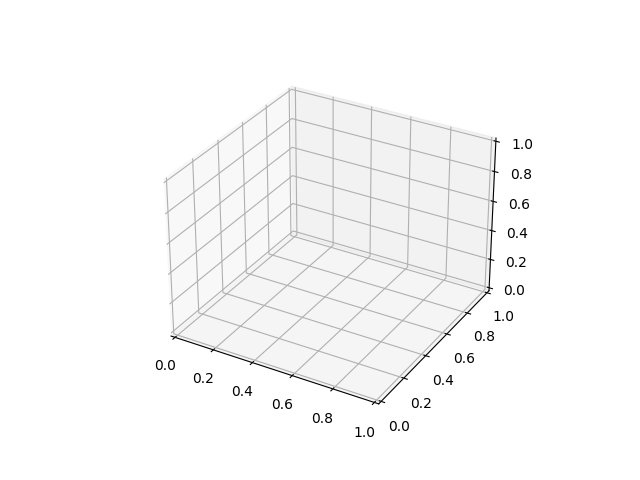

In [33]:
# creating figure 
figg2 = plt.figure() 
ax2 = figg2.add_subplot(111, projection='3d') 

In [34]:
ax2.clear()
plot_geeks = ax2.scatter(xs, ys, zs, marker='o', c='r') 
plot_geeks = ax2.scatter(TY[:,0], TY[:,[1]], TY[:,[2]], marker='o', facecolors='none', edgecolors='b', linewidths = 2)
# setting title and labels 
ax2.set_title("Rigid regiration result") 
ax2.set_xlabel('x-axis') 
ax2.set_ylabel('y-axis') 
ax2.set_zlabel('z-axis') 

Text(0.5, 0, 'z-axis')

In [35]:
# create a small rotation to apply to the target for testing the registration
thetax = (10/180)*np.pi
thetay = (10/180)*np.pi
thetaz = (10/180)*np.pi

rotx = np.array([
 [1, 0, 0],
 [0, np.cos(thetax), -np.sin(thetax)],
 [0, np.sin(thetax), np.cos(thetax)]
])

roty = np.array([
 [np.cos(thetay), 0, np.sin(thetay)],
 [0, 1, 0],
 [-np.sin(thetay), 0, np.cos(thetay)],
])

rotz = np.array([
 [np.cos(thetaz), -np.sin(thetaz), 0],
 [np.sin(thetaz), np.cos(thetaz), 0],
 [0, 0, 1]
])

scale = np.array([
    [1, 0, 0],
    [0, 2, 0],
    [0, 0, 2]
])

scaled = scale.dot(arr.T).T

# apply rotation through dot products
rot = np.dot(np.dot(rotx, roty),rotz)
rotated = rot.dot(scaled.T).T

# create a translation matrix with random displacement to apply to the target for testing the registration
translation = np.random.normal(0, 10, size=rotated.shape)
#translation = translation + [0, 1000, 0]

# create a fake source by adding a translation to the target.
# in a real use, you would load the source points from a file or other source.
# the only requirement is that this array also be 2-dimensional and that the
# second dimension be the same length as the second dimension of the target array.
source = rotated + translation

# create a RigidRegistration object
reg = RigidRegistration(X=arr, Y=source)
# run the registration & collect the results
TY, (s_reg, R_reg, t_reg) = reg.register()

# TY is the transformed source points
# the values in () are the registration parameters.
# In this case of rigid registration they are:
#     s_reg the scale of the registration
#     R_reg the rotation matrix of the registration
#     t_reg the translation of the registration
registrationRMS = np.sqrt(np.mean((TY-arr)**2))
print('RMS of registraion:', registrationRMS)

RMS of registraion: 151.22653201587596


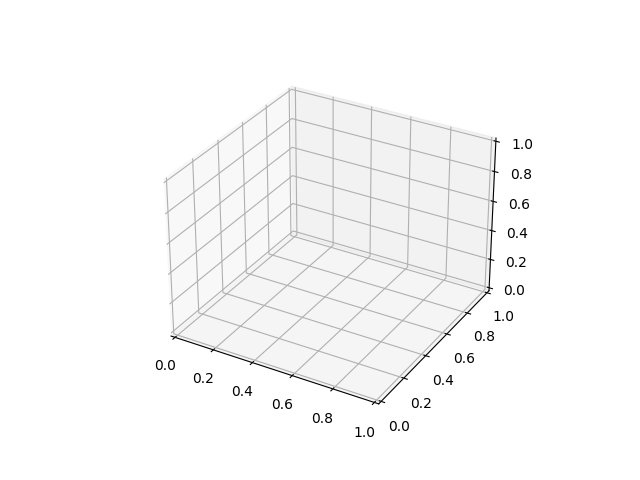

In [36]:
# creating figure 
figg3 = plt.figure() 
ax3 = figg3.add_subplot(111, projection='3d') 

In [37]:
ax3.clear()
plot_geeks = ax3.scatter(xs, ys, zs, marker='o', c='r') 
plot_geeks = ax3.scatter(source[:,[0]], source[:,[1]], source[:,[2]], marker='o', facecolors='none', edgecolors='b', linewidths = 2) 

# setting title and labels 
ax3.set_title("Small rotation, local displacements and scaling") 
ax3.set_xlabel('x-axis') 
ax3.set_ylabel('y-axis') 
ax3.set_zlabel('z-axis') 

# setting limits to each axis
ax3.set_xlim(-1100,1100)
ax3.set_ylim(-100,2100)
ax3.set_zlim(-1100,1100)

(-1100.0, 1100.0)

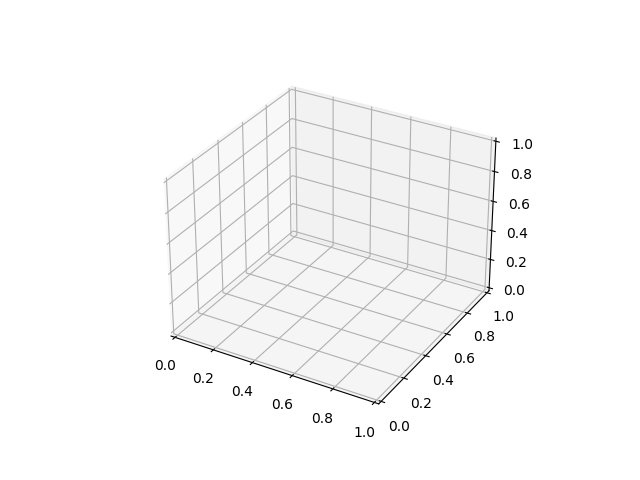

In [38]:
# creating figure 
figg4 = plt.figure() 
ax4 = figg4.add_subplot(111, projection='3d') 

In [39]:
ax4.clear()
plot_geeks = ax4.scatter(xs, ys, zs, marker='o', c='r') 
plot_geeks = ax4.scatter(TY[:,0], TY[:,[1]], TY[:,[2]], marker='o', facecolors='none', edgecolors='b', linewidths = 2)
# setting title and labels 
ax4.set_title("Rigid registraion result 2") 
ax4.set_xlabel('x-axis') 
ax4.set_ylabel('y-axis') 
ax4.set_zlabel('z-axis') 

Text(0.5, 0, 'z-axis')

In [40]:
# Run Affine registraion
# create a AffineRegistration object
reg = AffineRegistration(**{'X': arr, 'Y': source})
# run the registration & collect the results
TYAffine, Y = reg.register()

# TY is the transformed source points
# the values in () are the registration parameters.
# In this case of rigid registration they are:
#     s_reg the scale of the registration
#     R_reg the rotation matrix of the registration
#     t_reg the translation of the registration
registrationRMS = np.sqrt(np.mean((TYAffine-arr)**2))
print('RMS of registraion:', registrationRMS)

RMS of registraion: 7.016440814207382


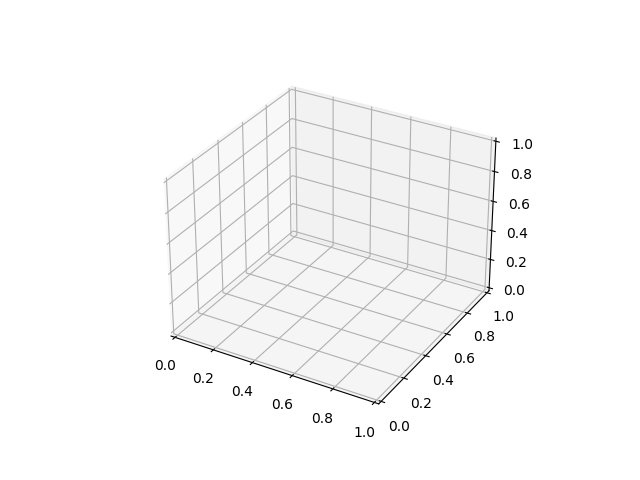

In [41]:
# creating figure 
figg5 = plt.figure() 
ax5 = figg5.add_subplot(111, projection='3d') 

In [42]:
ax5.clear()
plot_geeks = ax5.scatter(xs, ys, zs, marker='o', c='r') 
plot_geeks = ax5.scatter(TYAffine[:,0], TYAffine[:,[1]], TYAffine[:,[2]], marker='o', facecolors='none', edgecolors='b', linewidths = 2)
# setting title and labels 
ax5.set_title("Affine registration result") 
ax5.set_xlabel('x-axis') 
ax5.set_ylabel('y-axis') 
ax5.set_zlabel('z-axis') 

Text(0.5, 0, 'z-axis')

In [43]:
# Run Deformable registraion
# create a DeformableRegistration object
reg = DeformableRegistration(**{'X': arr, 'Y': source, 'low_rank': True})
# run the registration & collect the results
TYdeformed, Y = reg.register()

# TY is the transformed source points
# the values in () are the registration parameters.
# In this case of rigid registration they are:
#     s_reg the scale of the registration
#     R_reg the rotation matrix of the registration
#     t_reg the translation of the registration
registrationRMS = np.sqrt(np.mean((TYdeformed-arr)**2))
print('RMS of registraion:', registrationRMS)

RMS of registraion: 407.48512335727


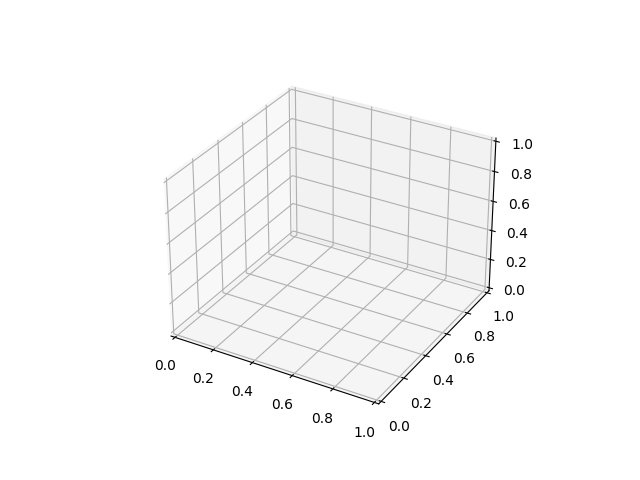

In [44]:
# creating figure 
figg6 = plt.figure() 
ax6 = figg6.add_subplot(111, projection='3d') 


In [45]:
ax6.clear()
plot_geeks = ax6.scatter(xs, ys, zs, marker='o', c='r') 
plot_geeks = ax6.scatter(TYdeformed[:,0], TYdeformed[:,[1]], TYdeformed[:,[2]], marker='o', facecolors='none', edgecolors='b', linewidths = 2)
# setting title and labels 
ax6.set_title("Deformable registration result") 
ax6.set_xlabel('x-axis') 
ax6.set_ylabel('y-axis') 
ax6.set_zlabel('z-axis') 

Text(0.5, 0, 'z-axis')

In [50]:
# Run Deformable registraion
# create a DeformableRegistration object
reg = DeformableRegistration(**{'X': arr, 'Y': TYAffine})
# run the registration & collect the results
TYdeformed, Y = reg.register()

# TY is the transformed source points
# the values in () are the registration parameters.
# In this case of rigid registration they are:
#     s_reg the scale of the registration
#     R_reg the rotation matrix of the registration
#     t_reg the translation of the registration
registrationRMS = np.sqrt(np.mean((TYdeformed-arr)**2))
print('RMS of registraion:', registrationRMS)

RMS of registraion: 6.967976922780802


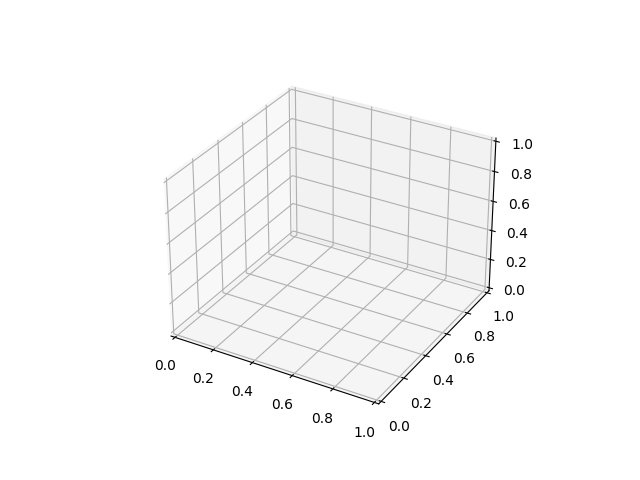

In [47]:
# creating figure 
figg7 = plt.figure() 
ax7 = figg7.add_subplot(111, projection='3d')

In [48]:
ax7.clear()
plot_geeks = ax7.scatter(xs, ys, zs, marker='o', c='r') 
plot_geeks = ax7.scatter(TYdeformed[:,0], TYdeformed[:,[1]], TYdeformed[:,[2]], marker='o', facecolors='none', edgecolors='b', linewidths = 2)
# setting title and labels 
ax7.set_title("Deformable registration result") 
ax7.set_xlabel('x-axis') 
ax7.set_ylabel('y-axis') 
ax7.set_zlabel('z-axis') 

Text(0.5, 0, 'z-axis')